In [1]:
'''

RESEARCH TOPIC: My Project is designed to determine the shape of the MW-M31 merger halo remnant. 
I expect the remnant to be oblate (x = y > z). In order to do this, I need to compare all 3 axial
lengths of the halo remnant. 

I need to create 2 plots of the halo: x vs. y and x vs. z, and use the package photutils 
to overplot isodensity contours onto each to get the axial lengths in x, y, and z. The package 
will tell me the axial lengths of each contour. These will be the values used for comparison. 
I need to make the graphs into images to use photutils. 

PLANNED STEPS:

1. import parackges (numpy, photutils, matplotlib,etc..) and CenterOfMass2
2. use an index to sort particles by type. I only need the halo particles for this 
project (type 1). 
3. combine the halo particle only position arrays so I can plot the combined 
MW-M31 halo. (use np.concatenate()?)
4. find center of mass using modified CenterOfMass2. This will determine the
r needed for Hernquist profile 
5. determine new combined halo mass from GalaxyMass code.
6. fit the Hernquist profile. This will determine the scale length (h_a). 
7. plot x vs. y 
8. plot x vs. z
9. convert plots to histograms/images. Photutils will only overplot on images.
10. use Photutils to overplot the isodensity contours to get the axial lengths 
in x and y from first graph, and z froms second. Use h_a to plot the countours for accuracy. 
11. compare. if x = y > z, then remnant is, indeed, oblate. if x = y < z, it is prolate. 

(OPTIONAL)
12. If i have time, I might overplot some contours using 1/2*h_a, or 2*r_a to compare. 


'''

'\n\nRESEARCH TOPIC: My Project is designed to determine the shape of the MW-M31 merger halo remnant. \nI expect the remnant to be oblate (x = y > z). In order to do this, I need to compare all 3 axial\nlengths of the halo remnant. \n\nI need to create 2 plots of the halo: x vs. y and x vs. z, and use the package photutils \nto overplot isodensity contours onto each to get the axial lengths in x, y, and z. The package \nwill tell me the axial lengths of each contour. These will be the values used for comparison. \nI need to make the graphs into images to use photutils. \n\nPLANNED STEPS:\n\n1. import parackges (numpy, photutils, matplotlib,etc..) and CenterOfMass2\n2. use an index to sort particles by type. I only need the halo particles for this \nproject (type 1). \n3. combine the halo particle only position arrays so I can plot the combined \nMW-M31 halo. (use np.concatenate()?)\n4. find center of mass using modified CenterOfMass2. This will determine the\nr needed for Hernquist pro

In [3]:
#import packages and edited, previously-made functions.
from RSCenterOfMass import CenterOfMass
from MassProfile import MassProfile

import numpy as np
import matplotlib.pyplot as plt 
import photutils 

In [4]:
#import high res files (do later bc the files take a while to download)
#use low res files for now to test. 

In [21]:
'''
Halodata() is an entirely new function I am building to facilitate
this project. 
'''
def Halodata(filename1,filename2):
    '''
    Halodata() is a function that will read the data from snapshot files for the 
    post-merger MW-M31 galaxy, pick out the halo particles, and create 
    arrays for the x, y, and z positions, as well as an array for the masses.

    PARAMETERS
    ----------
        filename1: 'str'
            the name of the snapshot file for the first galaxy
        filename2: 'str'
            the name of the snapshot file for the second galaxy

    OUTPUTS
    -------
        x_array: 'np.ndarray'
            an array that contains the x position of every particle in the 
            combined halo. 
        y_array: 'np.ndarray'
            an array that contains the y position of every particle in the 
            combined halo. 
        z_array: 'np.ndarray'
            an array that contains the z position of every particle in the 
            combined halo. 
        m_array: 'np.ndarray'
            an array that contains the masses of every particle in the 
            combined halo. 
    '''

    #read in both snapshot files
    time1, total_part1, data1 = Read(filename1)
    time2, total_part2, data2 = Read(filename2) 

    #create indexes to sort out the particles we want to examine by type
    #(in this case, type = 1, for halo particles.)
    index1 = np.where(data1['type'] == 1)
    index2 = np.where(data2['type'] == 1)

    #separate out the positions and mass for each halo particle for both files
    x1 = data1['x'][index1]
    y1 = data1['y'][index1]
    z1 = data1['z'][index1]
    m1 = data1['m'][index1]    

    x2 = data2['x'][index2]
    y2 = data2['y'][index2]
    z2 = data2['z'][index2]
    m2 = data2['m'][index2]

    #combine arrays using np.concatenate()
    x_array = np.concatenate((x1,x2))
    y_array = np.concatenate((y1,y2))
    z_array = np.concatenate((z1,z2))
    m_array = np.concatenate((m1,m2))
    
    #return the arrays for 
    return x_array, y_array, z_array, m_array

In [57]:
'''
find the total mass of the halo by summing over all of the values in m_array. 
halo_mass will be used later to make the Hernquist Mass Profile. 
'''

#calling Halodata() with files from appropriate M31 and MW snapshot file
x,y,z,m = Halodata("LOWRESM31_630.txt", "LOWRESMW_630.txt" )

#print(m) #test

#np.sum() totals the values of the array. halo_mass is a float. 
halo_mass = np.sum(m) #mass will be in 10**10 M_Sun. May need to change later. 

print(halo_mass) #test

389.5806499999998


In [59]:
#np.sum(x*m)/np.sum(m) #comparison value for CenterOfMass to test accuracy

In [61]:
'''
Need to find COM of merged galaxies to make the mass profile 

I am using an altered version of the CenterOfMass, in a file called "RSCenterOfMass"
(RS short for Research Assignment). This version of the function only includes the COM_P 
function, since I only need to find the positions. This class has been altered to
read from arrays instead of a file, due to the outputs of Halodata() being arrays. 
'''

#make an instance of the CenterOfMass class
COM = CenterOfMass()

#call COM_P, the function that finds the center of mass position from the 
#CenterOfMass Class, error tolerance and voldec have been altered for defaults 
Remnant_COM = COM.COM_P(1,4,x,y,z,m)

print(Remnant_COM) #test


[122.69  73.65  90.79] kpc


In [63]:
#import from HW 5. Hernquist Mass Profile code. 
#Find the scale radius for the combined halo (guess and check for values of h_a) 
def HernquistMass(r,h_a, m_halo):
    """ Function that defines the Hernquist 1990 mass profile 
    
    PARAMETERS
    ----------
    r : 'float' 
        Galactocentric distance in u.kpc 
    h_a : 'float' 
        scale radius of the Hernquist profile in u.kpc
    m_halo : 'float' 
        total halo mass in Msun
        
    RETURNS
    -------
    M_hernquist -- (array) total mass within the input radius r in Msun
    """
    #M = m_halo*r**2/(h_a + r)**2
    
    a = m_halo #constant

    b = r**2/(h_a + r)**2
    
    M_hernquist = a * b # Hernquist Profile
    
    return M_hernquist 

ValueError: x and y must have same first dimension, but have shapes (5,) and (50000,)

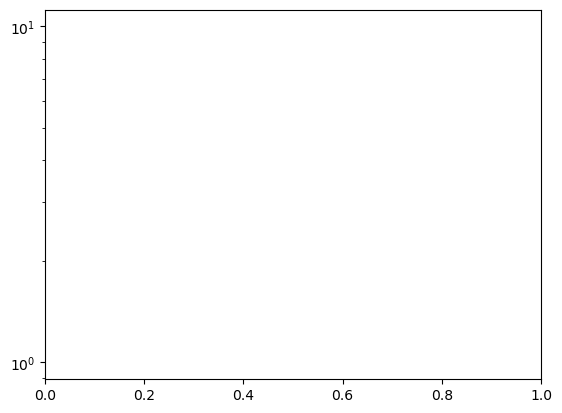

In [67]:
#make array of radii (in kpc) to give to Hernquist Mass
r_bins = np.linspace(0,200,5) #test these bins for r with HernquistMass first and refine 

#call HernquistMass. Will need to guess and check values of h_a. 
HQ_Profile = HernquistMass(r_bins, 60, halo_mass)

#plot Hernquist profile below. 

#creating the plot 
fig,ax = plt.subplots()

#plotting y axis in log scale
ax.semilogy(r_bins, m, color = "red", linewidth = "3",)
ax.semilogy(r_bins, HQ_Profile, color = "black", label = "Hernquist profile (a = 60 kpc)", linewidth = "3", linestyle = "--")

#making axes labels and setting the legend to show
ax.set_title ("Mass Profile of the MW-M31 Dark Matter Halo Remnant")
ax.set_ylabel("log(M) [Msun]")
ax.set_xlabel("radius [kpc]")
ax.legend()

In [ ]:
'''
note for tuesday 3/22:

***look at lab 7 

make 2D histogram of particles with scale radius circle overplotted to show its eccentricity (for now)
'''

In [20]:
#plot projections in this cell

#call photutils and give it the scale radius determined from HernquistMass

#plot x vs. z

#plot x vs. z